# EDA

In [3]:
import pandas as pd;

After doing the webscraping, we got data such as fund_size , fund_age , fund_manager, and mesurements like sortino,alpha,sd,beta,sharpe, amc_name and rating since they are dirctly not influencing the user, we didn't consider them.

#### Importing data

In [11]:
data = pd.read_csv('./data_with_sub_categories.csv')
data

,scheme_name,Scheme Codes,expense_ratio,risk_level,returns_1yr,returns_3yr,returns_5yr,Sub_Category
0,Aditya Birla SL Active Debt Multi-Mgr FoF-Dir ...,100033,0.27,3,4.0,6.5,6.9,FoFs Domestic
1,Aditya Birla SL Arbitrage Fund,100034,0.36,1,5.6,4.8,5.5,Arbitrage Mutual Funds
2,Aditya Birla SL Asset Allocator FoF-Dir Growth,100037,0.53,5,2.0,18.9,9.7,FoFs Domestic
3,Aditya Birla SL Balanced Advantage Fund,100038,0.61,6,4.5,18.6,9.7,Dynamic Asset Allocation or Balanced Advantage
4,Aditya Birla SL Banking&Financial Services-Dir...,100041,1.17,6,5.3,24.6,9.2,Sectoral / Thematic Mutual Funds
...,...,...,...,...,...,...,...,...
620,UTI-Treasury Advantage Fund,100800,0.33,2,5.2,7.3,4.8,Low Duration Funds
621,UTI-Ultra Short Term Fund,100801,0.44,3,5.4,6.1,5.7,Ultra Short Duration Funds
622,UTI-Unit Linked Insurance Plan – Direct,100802,0.96,4,-0.7,13.1,6.2,Dynamic Asset Allocation or Balanced Advantage
623,UTI-Value Opportunities Fund,100803,1.16,6,1.7,27.2,12.2,Value Funds


#### Checking for null values

In [5]:
# Check for missing values
print(data.isnull().sum())

scheme_name      0
Scheme Codes     0
expense_ratio    0
risk_level       0
returns_1yr      0
returns_3yr      0
returns_5yr      0
Sub_Category     0
dtype: int64


#### Summary Statistics

In [6]:
# Compute summary statistics for numerical variables
summary_stats = data[['expense_ratio', 'returns_1yr', 'returns_3yr', 'returns_5yr']].describe()

# Print the summary statistics
summary_stats

,expense_ratio,returns_1yr,returns_3yr,returns_5yr
count,625.000000,625.000000,625.000000,625.00000
mean,0.748592,4.242560,18.717280,9.44432
std,0.476202,7.123567,12.081507,3.73252
min,0.060000,-19.700000,3.300000,-4.10000
25%,0.350000,1.700000,6.400000,6.70000
50%,0.660000,4.400000,18.900000,8.80000
75%,1.050000,5.700000,27.700000,12.10000
max,2.590000,130.800000,71.400000,23.20000


### Data Distribution:

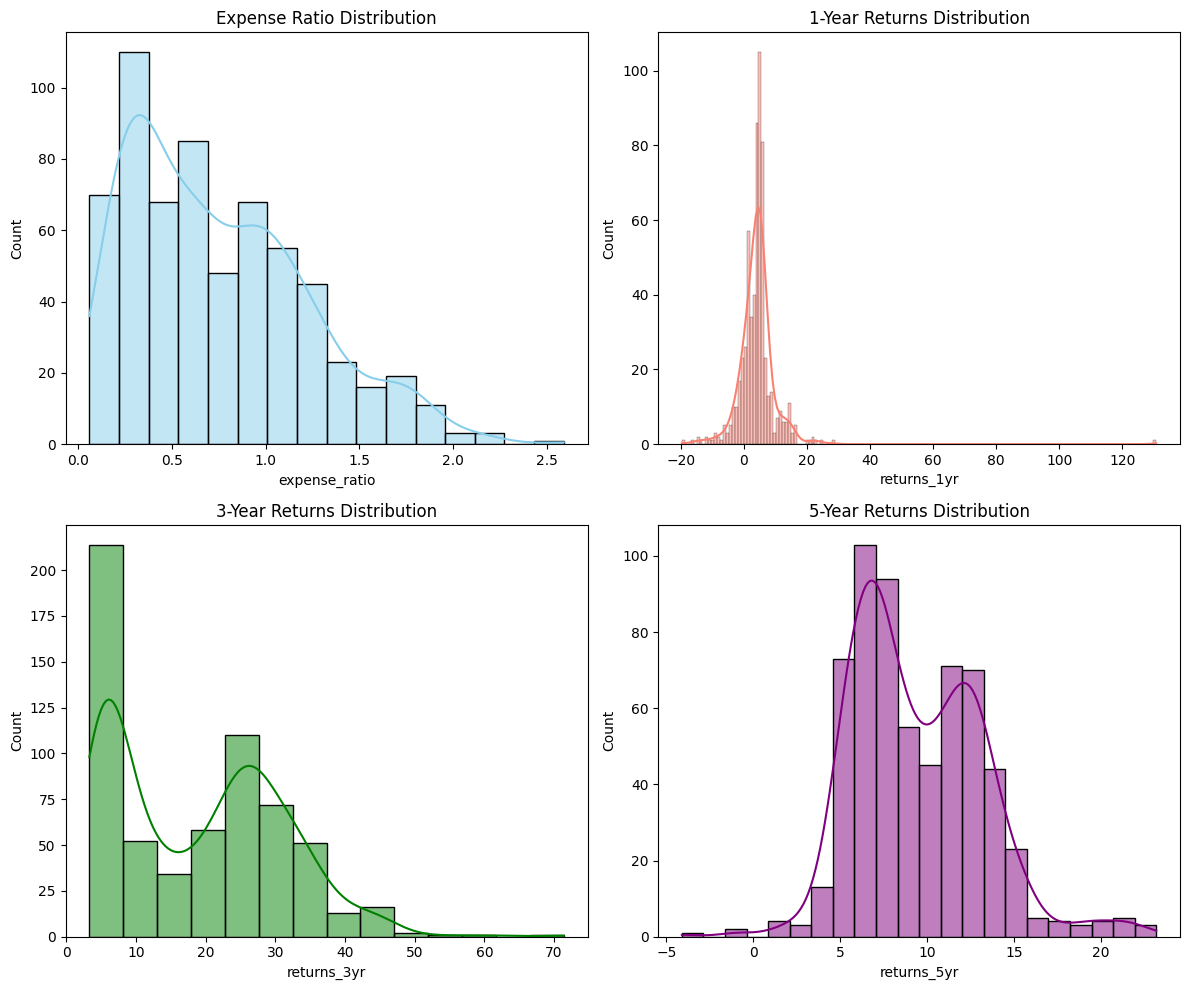

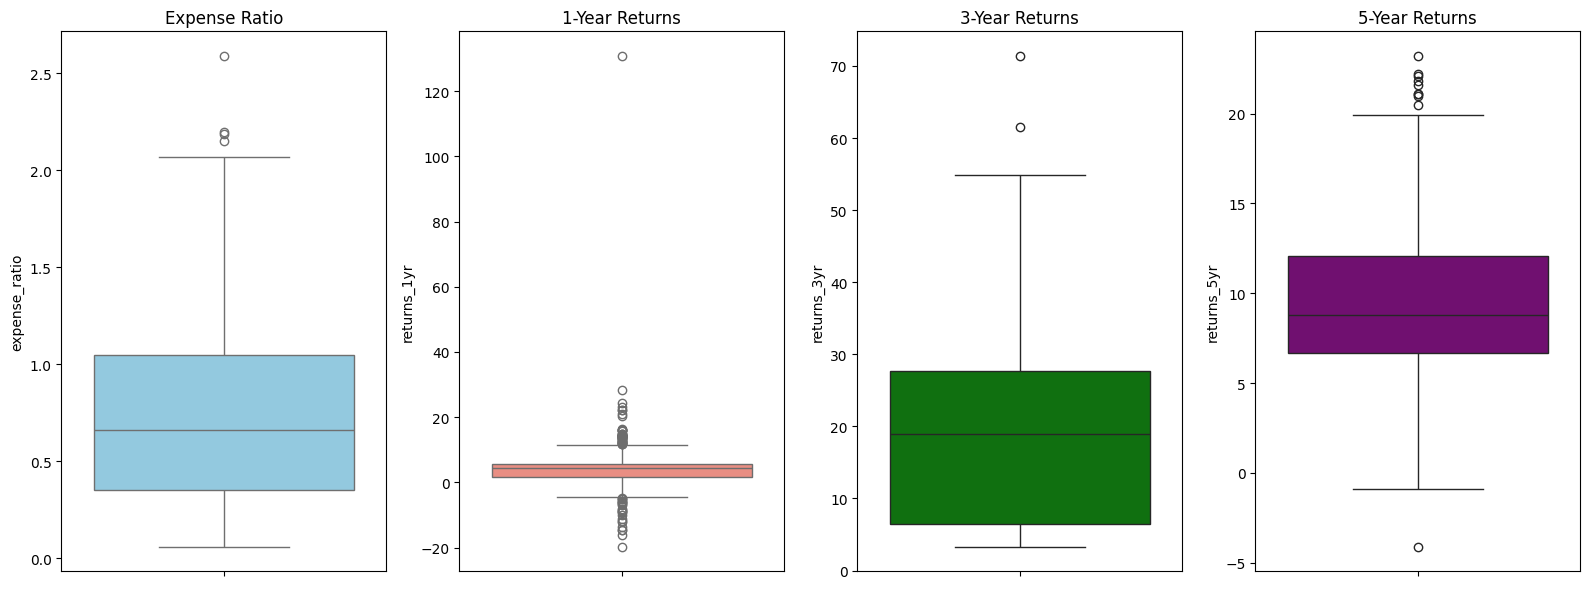

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set up the figure and axes for subplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))

# Histograms for numerical variables
sns.histplot(data['expense_ratio'], ax=axes[0, 0], kde=True, color='skyblue')
axes[0, 0].set_title('Expense Ratio Distribution')

sns.histplot(data['returns_1yr'], ax=axes[0, 1], kde=True, color='salmon')
axes[0, 1].set_title('1-Year Returns Distribution')

sns.histplot(data['returns_3yr'], ax=axes[1, 0], kde=True, color='green')
axes[1, 0].set_title('3-Year Returns Distribution')

sns.histplot(data['returns_5yr'], ax=axes[1, 1], kde=True, color='purple')
axes[1, 1].set_title('5-Year Returns Distribution')

# Adjust layout
plt.tight_layout()
plt.show()

# Box plots for numerical variables
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(16, 6))

sns.boxplot(y=data['expense_ratio'], ax=axes[0], color='skyblue')
axes[0].set_title('Expense Ratio')

sns.boxplot(y=data['returns_1yr'], ax=axes[1], color='salmon')
axes[1].set_title('1-Year Returns')

sns.boxplot(y=data['returns_3yr'], ax=axes[2], color='green')
axes[2].set_title('3-Year Returns')

sns.boxplot(y=data['returns_5yr'], ax=axes[3], color='purple')
axes[3].set_title('5-Year Returns')

# Adjust layout
plt.tight_layout()
plt.show()


### Correlation Analysis

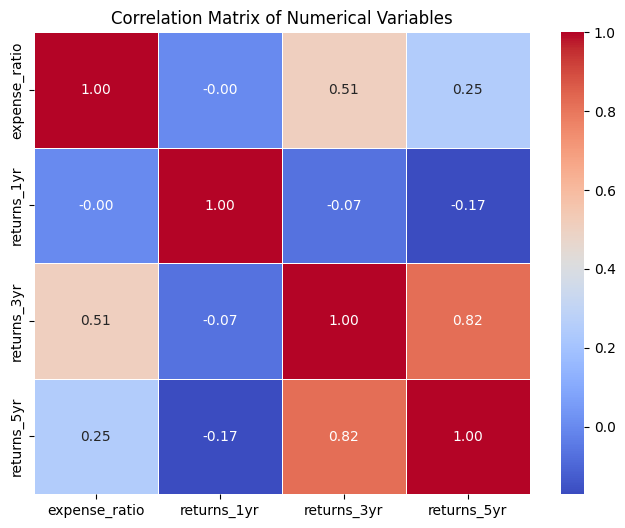

In [8]:
# Compute the correlation matrix
correlation_matrix = data[['expense_ratio', 'returns_1yr', 'returns_3yr', 'returns_5yr']].corr()

# Set up the figure and axes for the heatmap
plt.figure(figsize=(8, 6))

# Plot the heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)

# Add title
plt.title('Correlation Matrix of Numerical Variables')

# Show plot
plt.show()


There is a moderate positive correlation (0.51) between returns (1 year) and returns (3 year). This suggests that these two tend to move in the same direction, but not perfectly.
There is a strong positive correlation (0.82) between returns (1 year) and returns (5 year). This indicates that these two returns are highly correlated, meaning they tend to move in the same direction.
There is a moderate positive correlation (0.25) between returns (3 year) and returns (5 year). This suggests a positive relationship, but weaker than the correlation between returns (1 year) and returns (5 year).

### Trends Over Time

C:\Users\acer\AppData\Local\Temp\ipykernel_33964\211683492.py:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x=data.index, y='returns_1yr', data=data, ax=axes[0], ci=None)
C:\Users\acer\AppData\Local\Temp\ipykernel_33964\211683492.py:8: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x=data.index, y='returns_3yr', data=data, ax=axes[1], ci=None)
C:\Users\acer\AppData\Local\Temp\ipykernel_33964\211683492.py:11: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x=data.index, y='returns_5yr', data=data, ax=axes[2], ci=None)


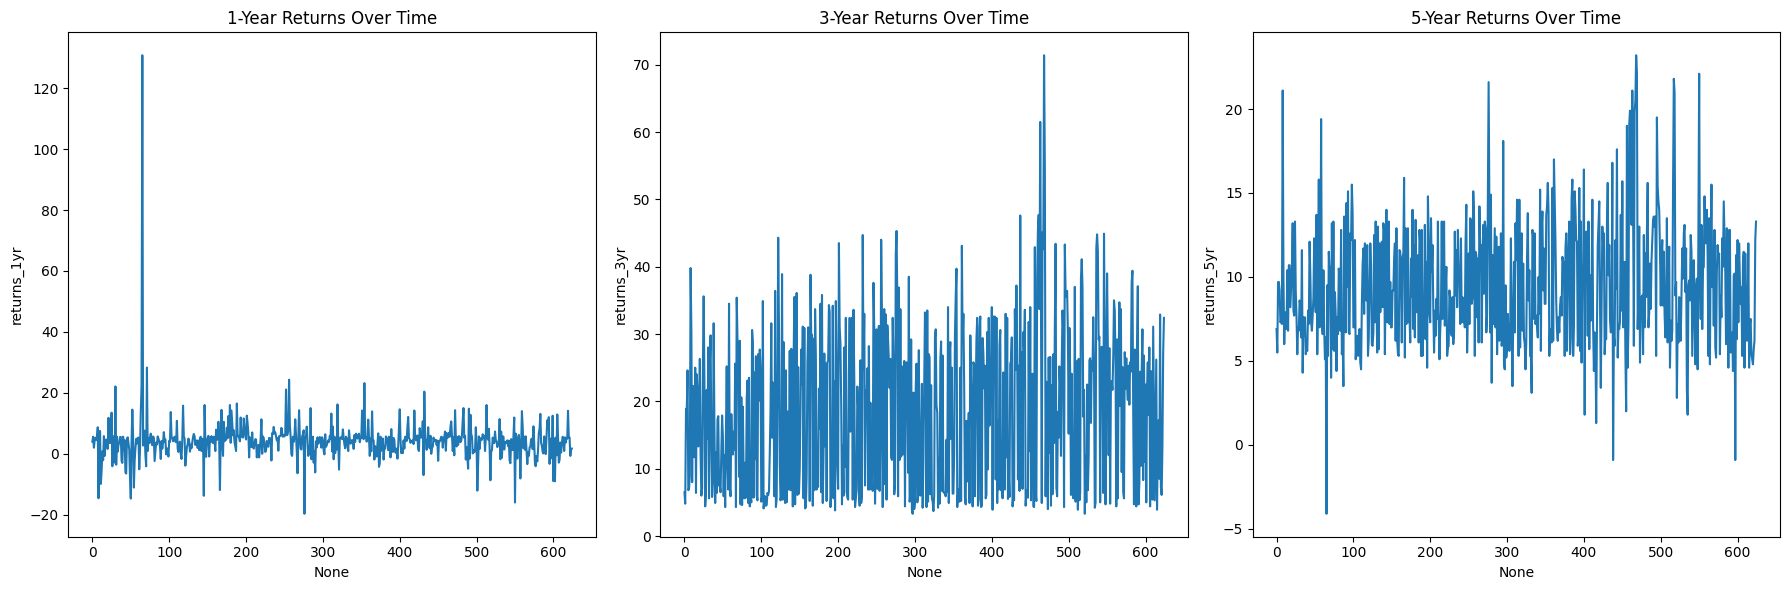

In [9]:
# Set up the figure and axes for subplots
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 6))

# Line plots for returns over time
sns.lineplot(x=data.index, y='returns_1yr', data=data, ax=axes[0], ci=None)
axes[0].set_title('1-Year Returns Over Time')

sns.lineplot(x=data.index, y='returns_3yr', data=data, ax=axes[1], ci=None)
axes[1].set_title('3-Year Returns Over Time')

sns.lineplot(x=data.index, y='returns_5yr', data=data, ax=axes[2], ci=None)
axes[2].set_title('5-Year Returns Over Time')

# Adjust layout
plt.tight_layout()
plt.show()


The lines are Volatile

### Outlier Detection:

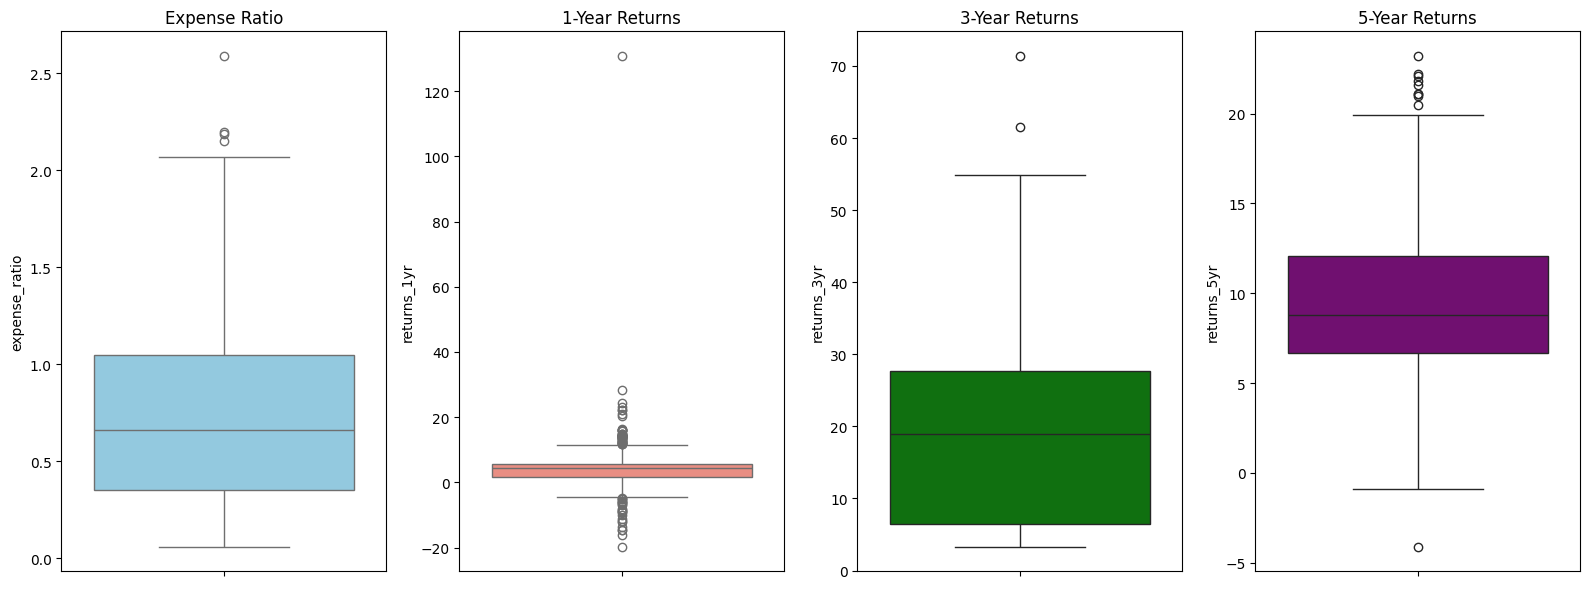

In [10]:
# Set up the figure and axes for subplots
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(16, 6))

# Box plots for numerical variables
sns.boxplot(y=data['expense_ratio'], ax=axes[0], color='skyblue')
axes[0].set_title('Expense Ratio')

sns.boxplot(y=data['returns_1yr'], ax=axes[1], color='salmon')
axes[1].set_title('1-Year Returns')

sns.boxplot(y=data['returns_3yr'], ax=axes[2], color='green')
axes[2].set_title('3-Year Returns')

sns.boxplot(y=data['returns_5yr'], ax=axes[3], color='purple')
axes[3].set_title('5-Year Returns')


# Adjust layout
plt.tight_layout()
plt.show()


## END